In [1]:

#FASE 5 MARLON MONTAGUTH SEPULVEDA 
# CURSO ANALISIS DE DATOS 
#UNAD 2024


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler


In [2]:
# Cargamos lod datos que estan en nuestra carpeta de analisi de datos fase 5
titanic_data = pd.read_csv('C:\\Users\\Janus\\Documents\\unad 2024\\analisis de datos\\fase 5\\Titanic-Dataset.csv')

In [3]:
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
#El método info() de un DataFrame de pandas proporciona un resumen conciso del DataFrame
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
#El método describe() de pandas proporciona estadísticas descriptivas del conjunto de datos
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


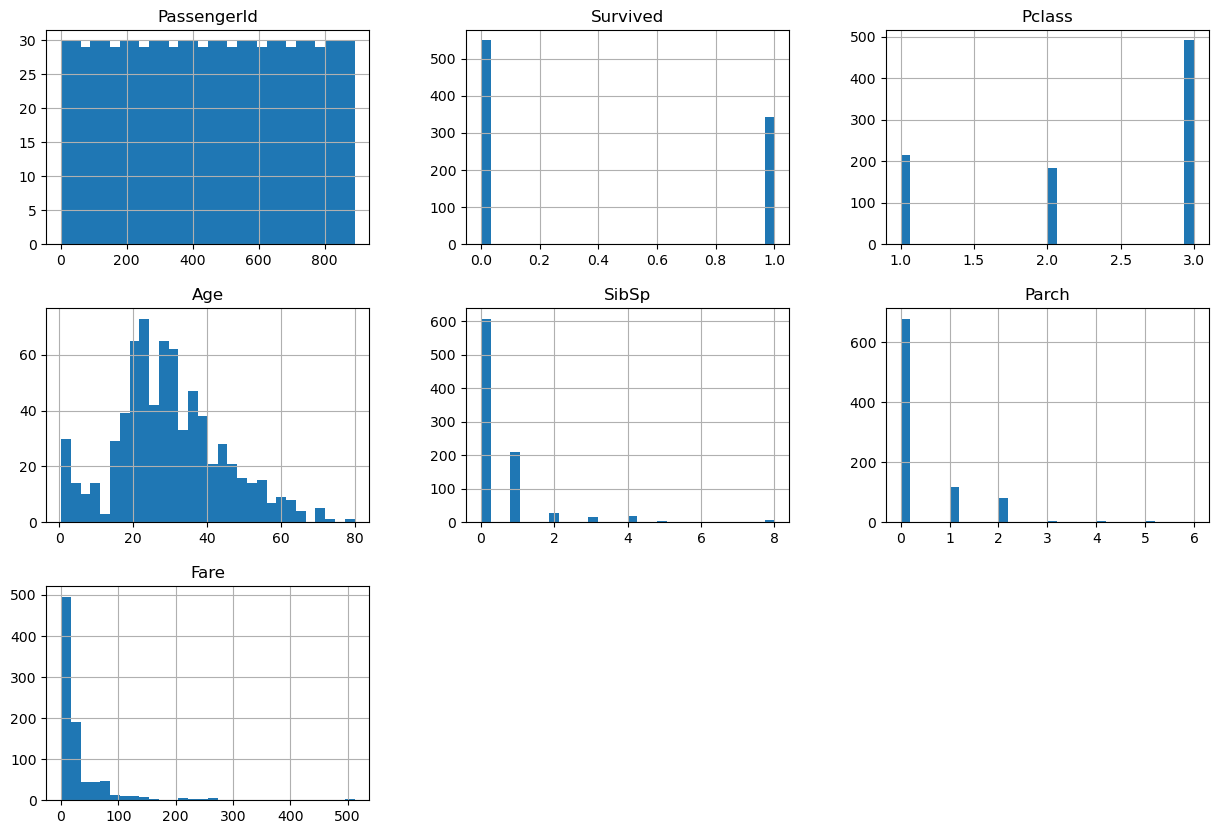

In [7]:
#el método hist de la biblioteca pandas para crear un histograma para cada columna en un DataFrame llamado titanic_data
titanic_data.hist(bins=30, figsize=(15, 10))
plt.show()

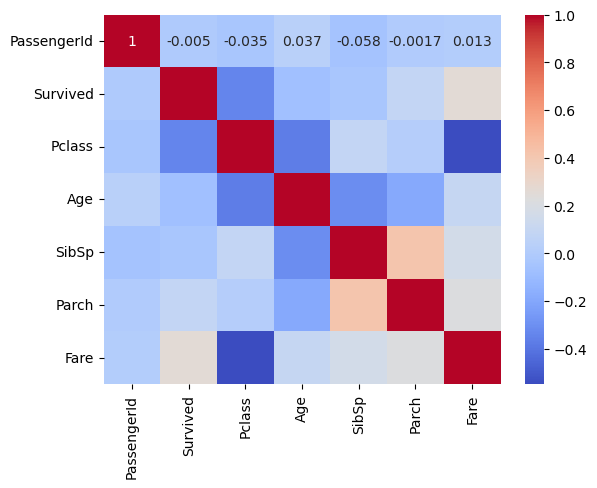

In [8]:
numeric_titanic_data = titanic_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

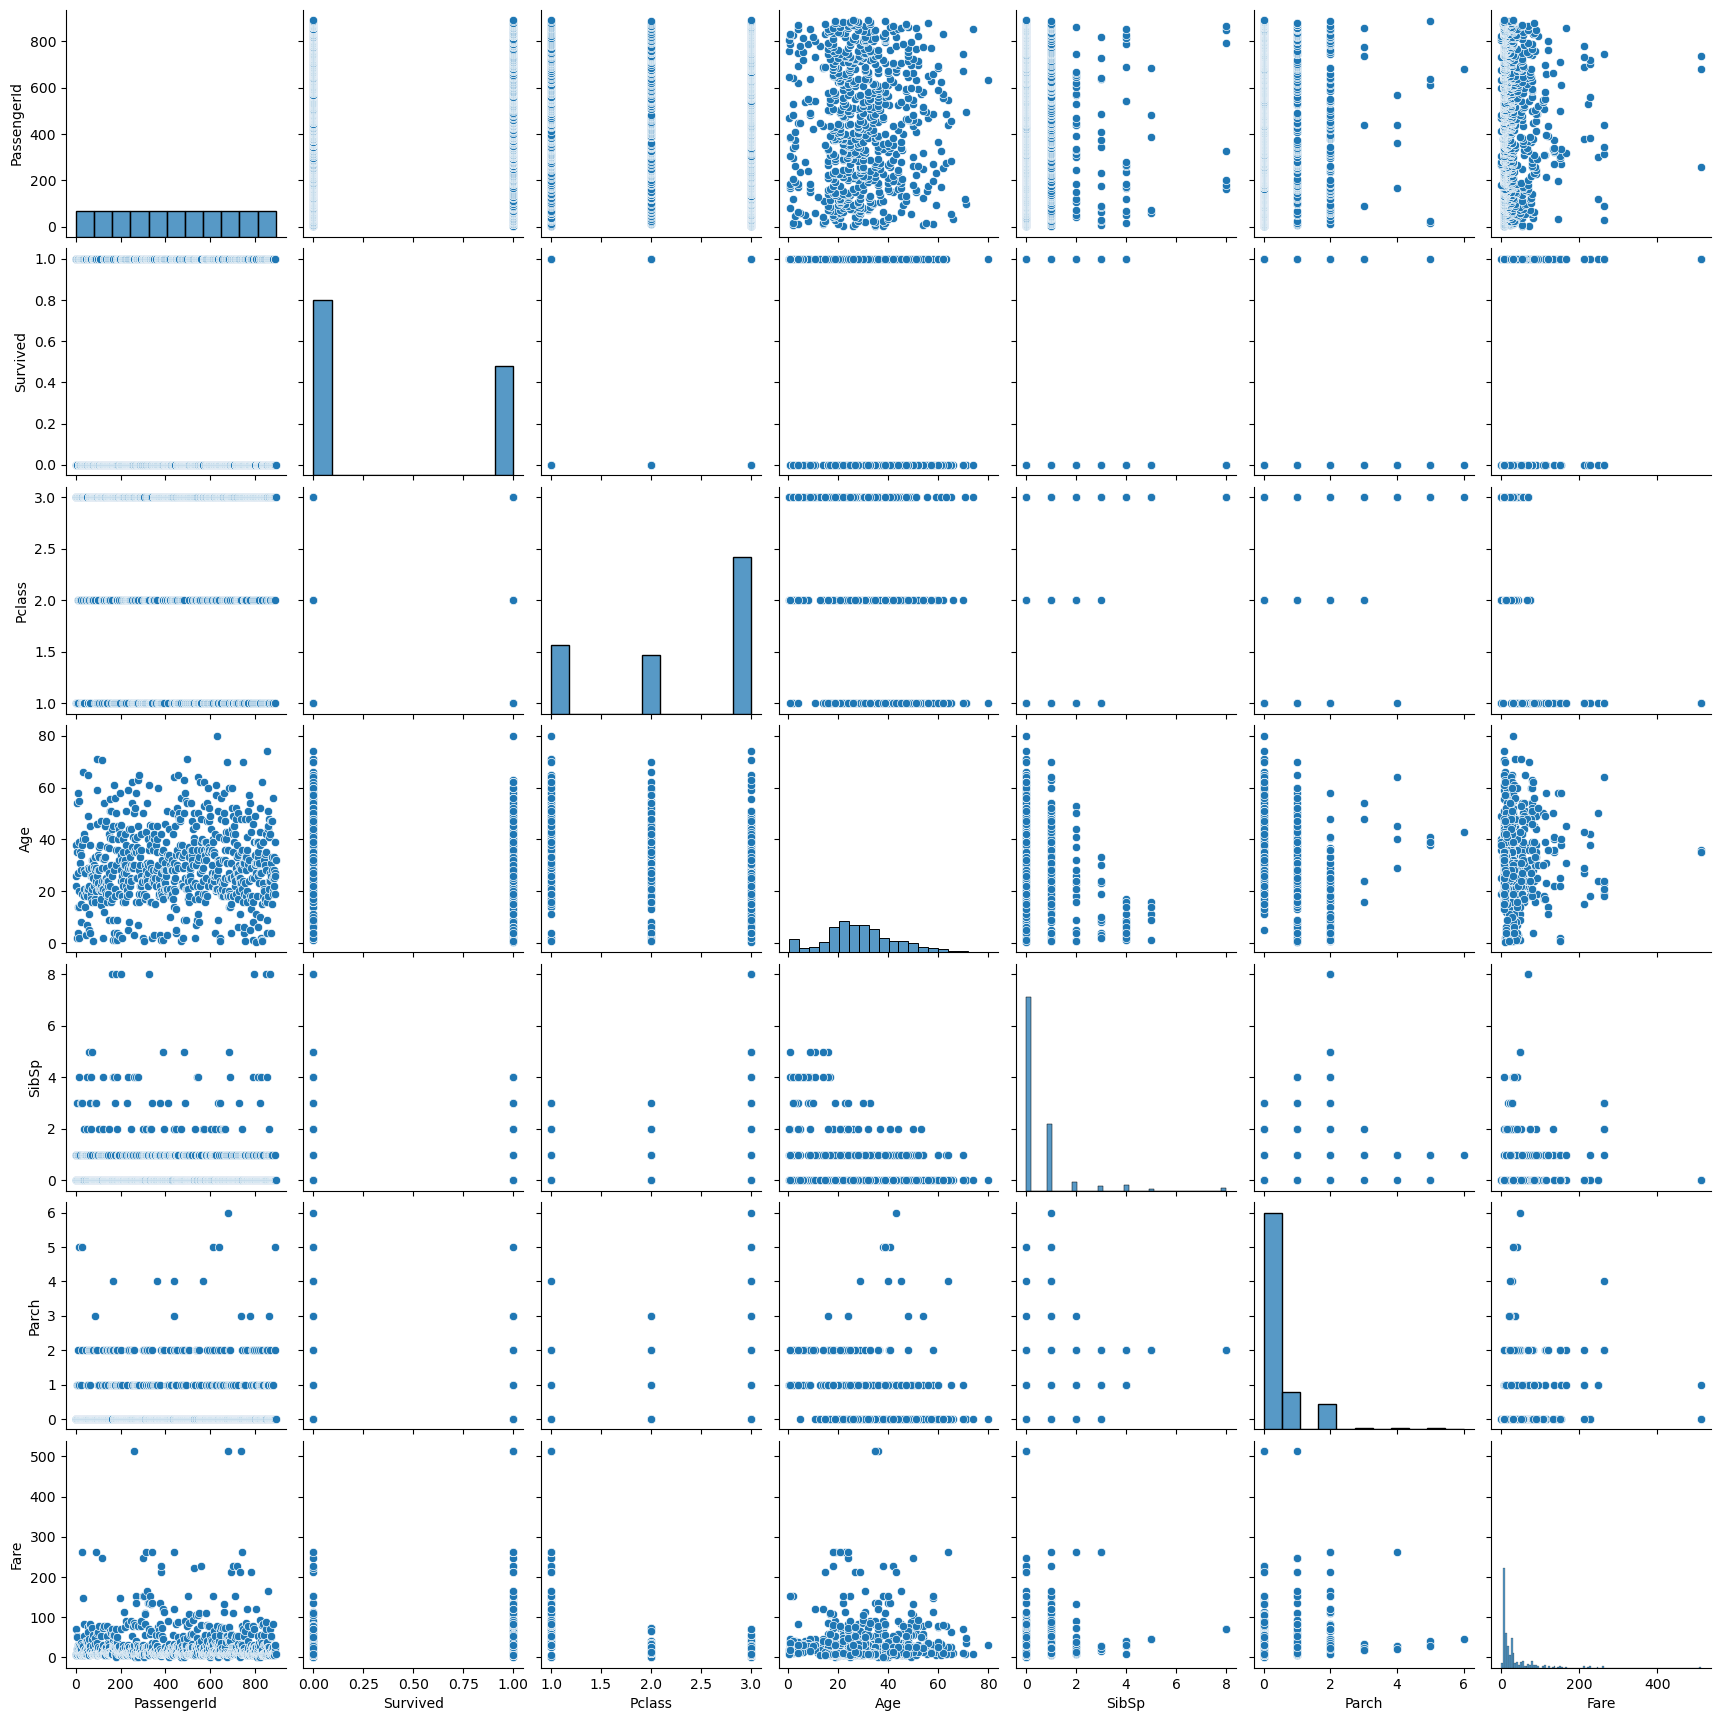

In [9]:
sns.pairplot(numeric_titanic_data)
plt.show()

In [10]:
titanic_data_cleaned = titanic_data.dropna()

In [11]:
titanic_data_cleaned = pd.get_dummies(titanic_data_cleaned, drop_first=True)

In [12]:
print(titanic_data_cleaned.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
              ..
Cabin_F4       0
Cabin_G6       0
Cabin_T        0
Embarked_Q     0
Embarked_S     0
Length: 450, dtype: int64


In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(titanic_data_cleaned)

In [14]:
titanic_data_scaled = pd.DataFrame(scaled_features, columns=titanic_data_cleaned.columns)

In [15]:
X = titanic_data_scaled.drop('Fare', axis=1)
y = titanic_data_scaled['Fare']

In [16]:
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000002B01146DD00>)

In [17]:
scores = pd.DataFrame({'Características': X.columns, 'Puntuación': selector.scores_})
print(scores)

    Características  Puntuación
0       PassengerId    0.160229
1          Survived    3.321597
2            Pclass   19.971178
3               Age    1.559454
4             SibSp   16.177172
..              ...         ...
444        Cabin_F4    0.544903
445        Cabin_G6    3.006101
446         Cabin_T    0.320462
447      Embarked_Q    0.044200
448      Embarked_S   11.276476

[449 rows x 2 columns]


In [18]:
k_best = 5
selected_features = selector.get_support(indices=True)[:k_best]
X_selected = X.iloc[:, selected_features]

In [19]:
#Dividir el dataset en Train y Test para evaluar correctamente el modelo
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [20]:
#Entrenar el modelo configurando los diferentes hiperparámetros
modelo = LinearRegression()


In [21]:
modelo.fit(X_train, y_train)

LinearRegression()

In [22]:
#Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
y_pred = modelo.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 0.592461348358339
Error Absoluto Medio (MAE): 0.5700221671717894
Coeficiente de Determinación (R²): 0.15354581108804266


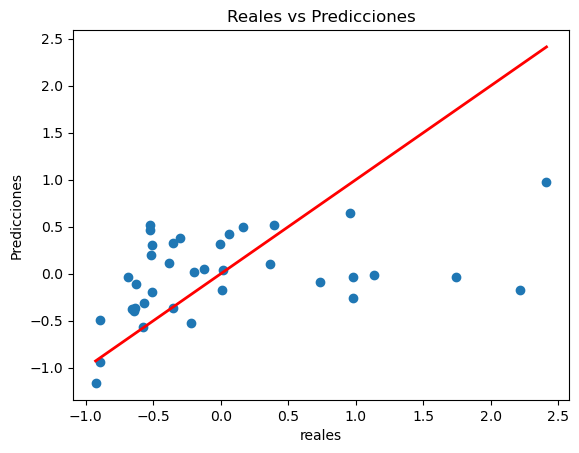

In [25]:
#Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('reales')
plt.ylabel('Predicciones')
plt.title('Reales vs Predicciones')
plt.show()

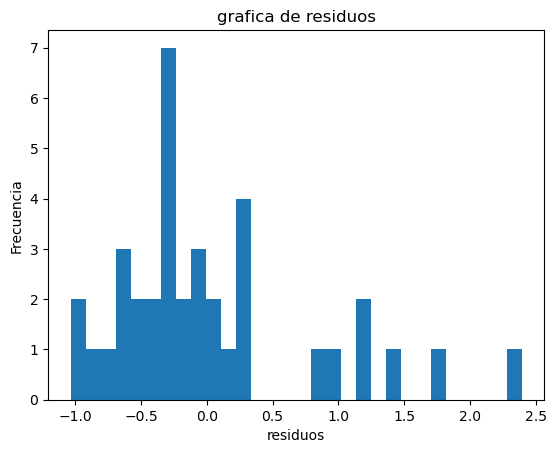

In [26]:
residuos = y_test - y_pred
plt.hist(residuos, bins=30)
plt.xlabel('residuos')
plt.ylabel('Frecuencia')
plt.title('grafica de residuos')
plt.show()